## **Re-attempt machine learning after removing outliers**

In this notebook, we check if removing outliers is able to improve our existing models.

In [17]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [18]:
machine_learning_data_ohe_up = pd.read_csv("datasets\\machine-learning-data-ohe-upscaled.csv")
machine_learning_data_ohe_up = machine_learning_data_ohe_up[['Pclass', 'Alone', 'Fare', 'Parch', 'Family_Size', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']]
machine_learning_data_ohe_up

,Pclass,Alone,Fare,Parch,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,0,7.2500,0,2,0.0,1.0,0.0,0.0,1.0,0
1,3,1,8.0500,0,1,0.0,1.0,0.0,0.0,1.0,0
2,3,1,8.4583,0,1,0.0,1.0,0.0,1.0,0.0,0
3,1,1,51.8625,0,1,0.0,1.0,0.0,0.0,1.0,0
4,3,0,21.0750,1,5,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1093,1,0,211.3375,1,2,1.0,0.0,0.0,0.0,1.0,1
1094,1,0,52.5542,1,3,1.0,0.0,0.0,0.0,1.0,1
1095,3,1,9.5000,0,1,0.0,1.0,0.0,0.0,1.0,1
1096,1,0,55.4417,0,2,0.0,1.0,1.0,0.0,0.0,1


In [19]:
q1 = machine_learning_data_ohe_up[['Fare', 'Family_Size', 'Parch', 'Survived']].quantile(0.25)
q3 = machine_learning_data_ohe_up[['Fare', 'Family_Size', 'Parch', 'Survived']].quantile(0.75)
iqr = q3 - q1
outliers = pd.DataFrame(machine_learning_data_ohe_up[((machine_learning_data_ohe_up[['Fare', 'Family_Size', 'Parch', 'Survived']]<(q1-1.5*iqr)) | (machine_learning_data_ohe_up[['Fare', 'Family_Size', 'Parch', 'Survived']]>(q3+1.5*iqr))).any(axis=1)])
outliers

,Pclass,Alone,Fare,Parch,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
4,3,0,21.0750,1,5,0.0,1.0,0.0,0.0,1.0,0
6,3,0,31.2750,5,7,0.0,1.0,0.0,0.0,1.0,0
8,3,0,29.1250,1,6,0.0,1.0,0.0,1.0,0.0,0
11,3,0,21.0750,1,5,1.0,0.0,0.0,0.0,1.0,0
13,1,0,263.0000,2,6,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1073,1,0,120.0000,2,4,1.0,0.0,0.0,0.0,1.0,1
1078,3,0,19.2583,1,4,1.0,0.0,1.0,0.0,0.0,1
1082,1,0,83.4750,0,2,1.0,0.0,0.0,0.0,1.0,1
1088,3,0,19.2583,3,4,1.0,0.0,1.0,0.0,0.0,1


In [21]:
machine_learning_data_ohe_remove_outliers_up = machine_learning_data_ohe_up
for index in outliers.index:
    machine_learning_data_ohe_remove_outliers_up = machine_learning_data_ohe_remove_outliers_up.drop(index=index)
machine_learning_data_ohe_remove_outliers_up.shape

(889, 11)

As we can see, the 209 rows of outliers have been removed from the dataset.

In [46]:
machine_learning_data_ohe_remove_outliers_up.to_csv("datasets\\machine-learning-data-ohe-upscaled-no-outliers.csv")

The OneHotEncoded and upscaled machine learning data without outliers has been exported to the `machine-learning-data-ohe-upscaled-no-outliers.csv` in the `datasets` folder.

#### **Impact on Decision Tree model**

We first test the new dataset without outliers on the Decision Tree to see if it improves our previous Decision Tree model.

[Text(0.45535714285714285, 0.9, 'Sex_male <= 0.5\ngini = 0.498\nsamples = 622\nvalue = [329, 293]\nclass = 0'),
 Text(0.19642857142857142, 0.7, 'Pclass <= 2.5\ngini = 0.249\nsamples = 220\nvalue = [32, 188]\nclass = 1'),
 Text(0.10714285714285714, 0.5, 'Fare <= 26.125\ngini = 0.082\nsamples = 117\nvalue = [5, 112]\nclass = 1'),
 Text(0.07142857142857142, 0.3, 'Fare <= 12.825\ngini = 0.148\nsamples = 62\nvalue = [5, 57]\nclass = 1'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]\nclass = 1'),
 Text(0.10714285714285714, 0.1, 'gini = 0.198\nsamples = 45\nvalue = [5, 40]\nclass = 1'),
 Text(0.14285714285714285, 0.3, 'gini = 0.0\nsamples = 55\nvalue = [0, 55]\nclass = 1'),
 Text(0.2857142857142857, 0.5, 'Embarked_Q <= 0.5\ngini = 0.387\nsamples = 103\nvalue = [27, 76]\nclass = 1'),
 Text(0.21428571428571427, 0.3, 'Fare <= 20.231\ngini = 0.441\nsamples = 67\nvalue = [22, 45]\nclass = 1'),
 Text(0.17857142857142858, 0.1, 'gini = 0.464\nsamples = 60\nvalue = [22, 3

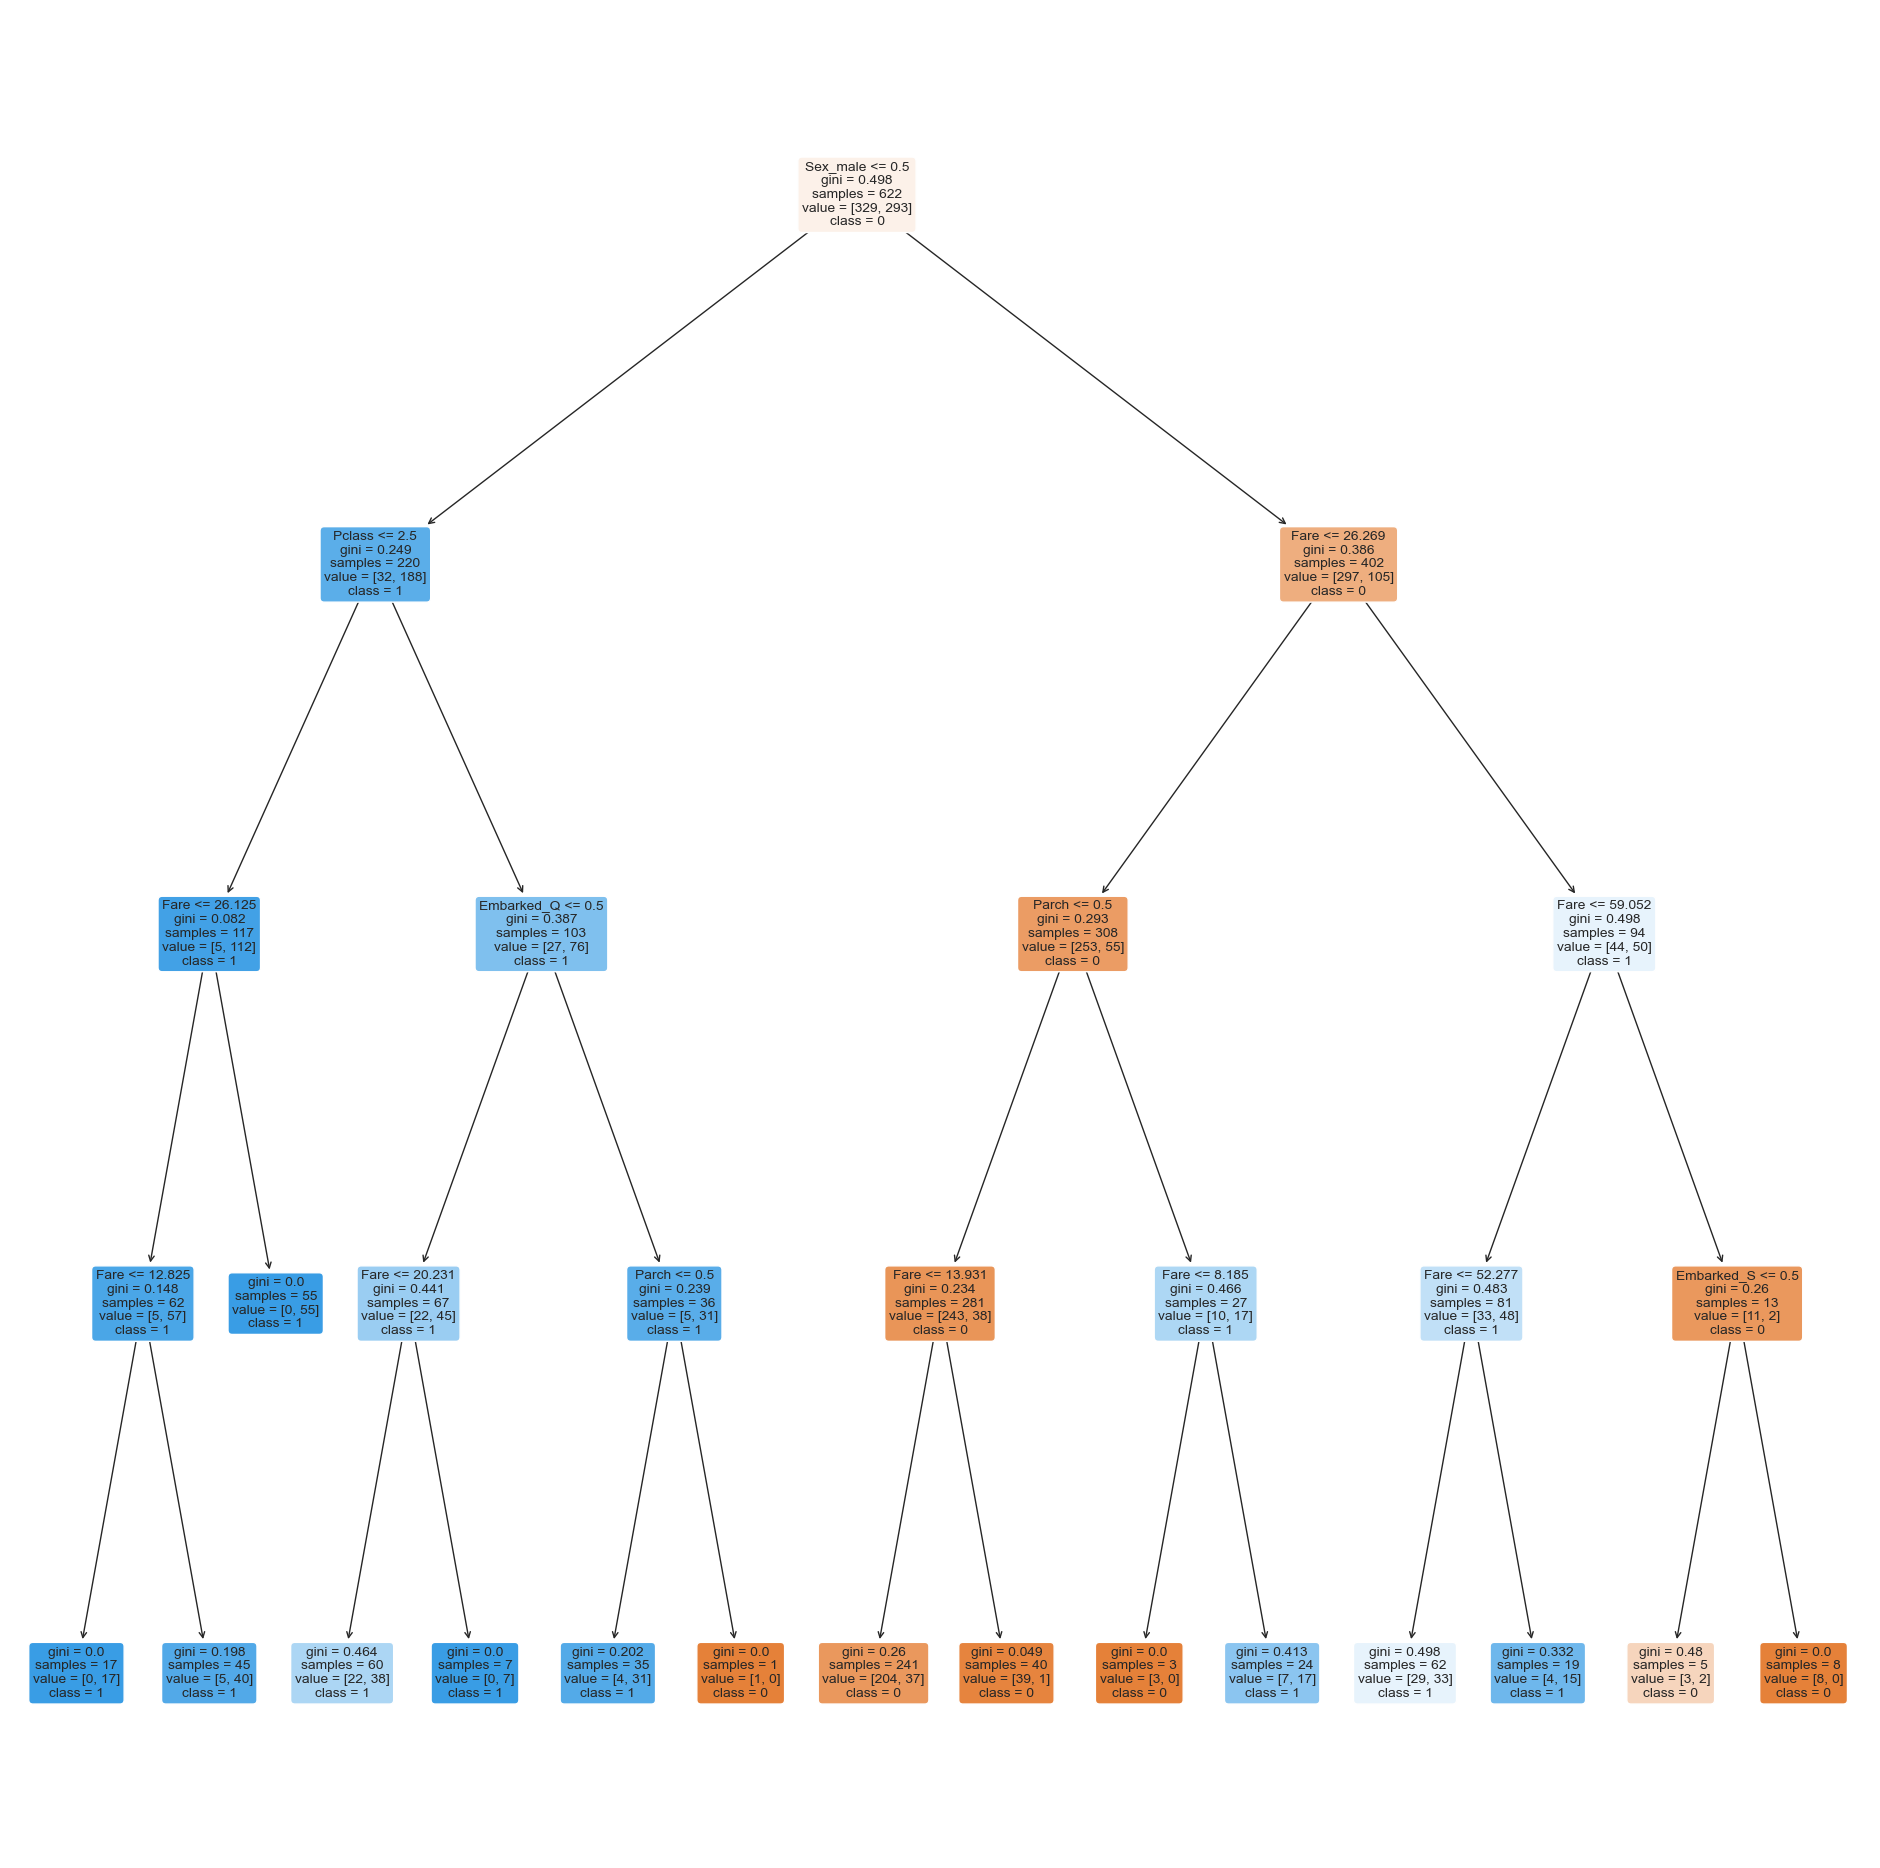

In [22]:
y = pd.DataFrame(machine_learning_data_ohe_remove_outliers_up['Survived'])
X = pd.DataFrame(machine_learning_data_ohe_remove_outliers_up.drop('Survived', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =13)
dectree = DecisionTreeClassifier(max_depth = 4) 
dectree.fit(X_train, y_train)  

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

Train Data
Accuracy  :	 0.8215434083601286

TPR Train :	 0.863481228668942
TNR Train :	 0.78419452887538

FPR Train :	 0.21580547112462006
FNR Train :	 0.13651877133105803


<AxesSubplot:>

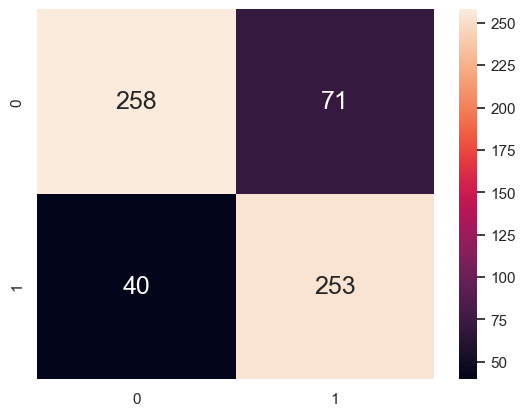

In [23]:
y_train_pred = dectree.predict(X_train)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]
fpTrain = cmTrain[0][1]
tnTrain = cmTrain[0][0]
fnTrain = cmTrain[1][0]

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7827715355805244

TPR Test :	 0.875
TNR Test :	 0.7074829931972789

FPR Test :	 0.2925170068027211
FNR Test :	 0.125


<AxesSubplot:>

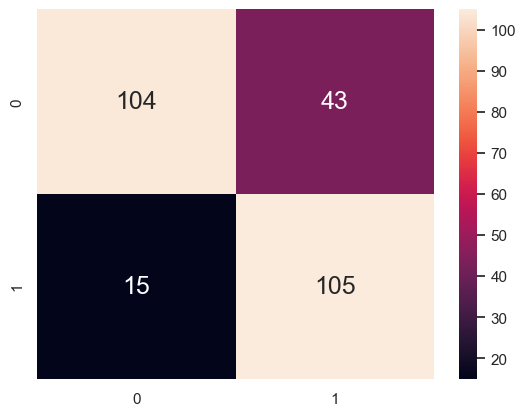

In [24]:
y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

As compared to the decision tree with upscaled data, the accuracy of both train and test data has dropped, which shows that removing outliers does not aid in the model made by the decision tree.

#### **Impact on Random Forest model**

In [25]:
y = pd.DataFrame(machine_learning_data_ohe_remove_outliers_up['Survived'])
X = pd.DataFrame(machine_learning_data_ohe_remove_outliers_up.drop('Survived', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =13)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 4)       

rforest.fit(X_train, y_train.Survived.ravel())

RandomForestClassifier(max_depth=4)

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(100,1001,100),  
              'max_depth': np.arange(2, 11)}             

hpGrid = GridSearchCV(RandomForestClassifier(),   
                      param_grid,                 
                      cv = 5,                     
                      scoring = 'accuracy')       

hpGrid.fit(X_train, y_train.Survived.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [29]:
print(hpGrid.best_estimator_)
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=7, n_estimators=600)
0.8247354838709677


In [35]:
y = pd.DataFrame(machine_learning_data_ohe_remove_outliers_up['Survived'])
X = pd.DataFrame(machine_learning_data_ohe_remove_outliers_up.drop('Survived', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=13)

rforest = RandomForestClassifier(n_estimators = 600,   
                                 max_depth = 7)       

rforest.fit(X_train, y_train.Survived.ravel())

RandomForestClassifier(max_depth=7, n_estimators=600)

Train Data
Accuracy  :	 0.8906752411575563

TPR Train :	 0.8668941979522184
TNR Train :	 0.9118541033434651

FPR Train :	 0.08814589665653495
FNR Train :	 0.13310580204778158


<AxesSubplot:>

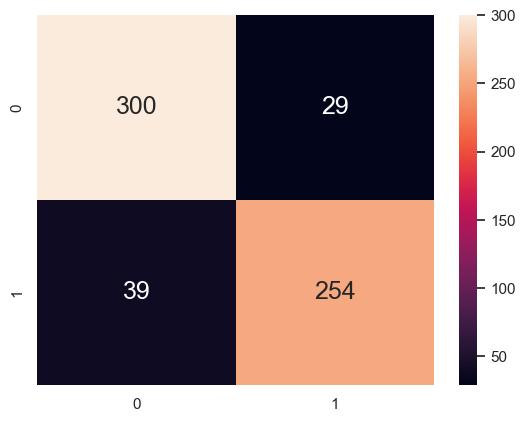

In [36]:
y_train_pred = rforest.predict(X_train)

print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8202247191011236

TPR Test :	 0.8416666666666667
TNR Test :	 0.8027210884353742

FPR Test :	 0.19727891156462585
FNR Test :	 0.15833333333333333


<AxesSubplot:>

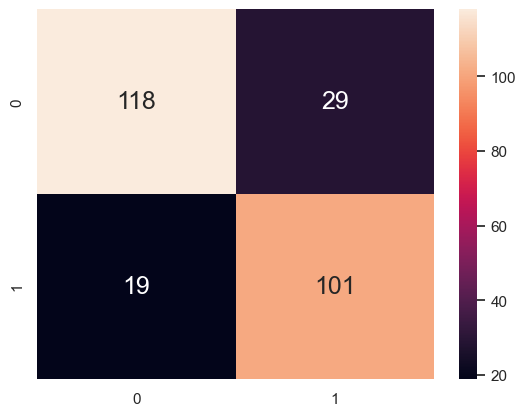

In [37]:
y_test_pred = rforest.predict(X_test)

print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

As compared to the Random Forest model, the accuracy of both train and test data has dropped, which shows that removing outliers does not aid in the model made by the Random Forest.

#### **Impact on SVM model**

In [40]:
from sklearn.svm import SVC

In [38]:
y = pd.DataFrame(machine_learning_data_ohe_remove_outliers_up['Survived'])
X = pd.DataFrame(machine_learning_data_ohe_remove_outliers_up.drop('Survived', axis = 1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =13)

In [42]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)

grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [43]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


Train Data
Accuracy  :	 0.9035369774919614

TPR Train :	 0.8668941979522184
TNR Train :	 0.9361702127659575

FPR Train :	 0.06382978723404255
FNR Train :	 0.13310580204778158


<AxesSubplot:>

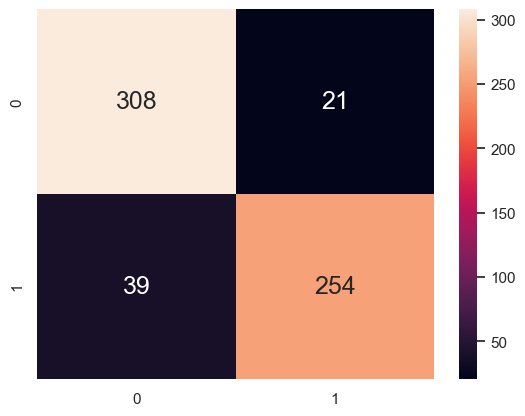

In [44]:
model = SVC(C= 100, gamma= 1, kernel= 'rbf')
model.fit(X_train, y_train)
  
y_train_pred = model.predict(X_train)
print("Train Data")
print("Accuracy  :\t", model.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.846441947565543

TPR Test :	 0.8333333333333334
TNR Test :	 0.8571428571428571

FPR Test :	 0.14285714285714285
FNR Test :	 0.16666666666666666


<AxesSubplot:>

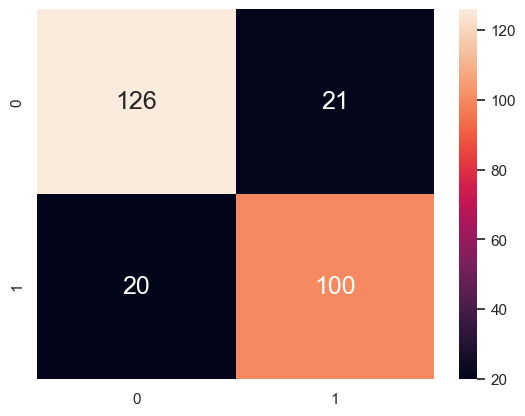

In [45]:
print("Test Data")
print("Accuracy  :\t", model.score(X_test, y_test))
print()
y_test_pred = model.predict(X_test)
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Like the rest of the models, the SVM accuracy of both train and test datasets also suffered due to the removal of outliers.

As such, we conclude that removing outliers does not aid in improving our models.